# 다층 신경망 XOR

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Activation, Flatten, Dropout
from keras.datasets import fashion_mnist
from sklearn.metrics import confusion_matrix
from sklearn import datasets
import seaborn as sns

In [4]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
hist = model.fit(X, y,  epochs=7000, verbose=0)
print(model.predict(X))
print(model.predict(X) > 0.5)  # accuracy

[[0.00146818]
 [0.9982675 ]
 [0.99906284]
 [0.00203001]]
[[False]
 [ True]
 [ True]
 [False]]


# ReLU 활성화 함수

In [6]:
model = Sequential()
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
hist = model.fit(X, y,  epochs=7000, verbose=0)
print(model.predict(X))
print(model.predict(X) > 0.5)  # accuracy

[[0.26768702]
 [0.62468374]
 [0.6247496 ]
 [0.624829  ]]
[[False]
 [ True]
 [ True]
 [ True]]


In [8]:
accs = []
for  i  in range(10) :
    model = Sequential()
    model.add(Dense(5, activation='sigmoid'))
    model.add(Dense(5, activation='sigmoid'))
    model.add(Dense(5, activation='sigmoid'))
    model.add(Dense(5, activation='sigmoid'))
    model.add(Dense(5, activation='sigmoid'))
    model.add(Dense(5, activation='sigmoid'))
    model.add(Dense(5, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
    hist = model.fit(X, y,  epochs=7000, verbose=0)
    acc = model.evaluate(X, y)
    accs.append(acc[1]) 

1/1 [==============================] - 0s 172ms/step - loss: 0.0020 - accuracy: 1.0000


In [9]:
model = Sequential()
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X, y,  epochs=7000, verbose=0)
print(model.predict(X))
print(model.evaluate(X, y))

[[0.01183984]
 [0.99999976]
 [0.99998766]
 [0.01183984]]
1/1 [==============================] - 0s 178ms/step - loss: 0.0060 - accuracy: 1.0000
[0.0059583899565041065, 1.0]


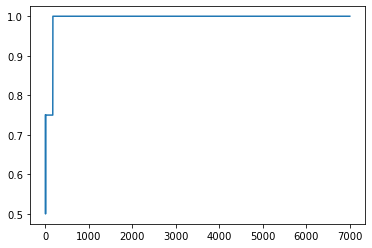

In [10]:
plt.plot(hist.history['accuracy'])

[[6.6661584e-01]
 [6.6661584e-01]
 [6.6661584e-01]
 [1.4537573e-04]]
1/1 [==============================] - 0s 96ms/step - loss: 0.4774 - accuracy: 0.7500
[0.47742193937301636, 0.75]


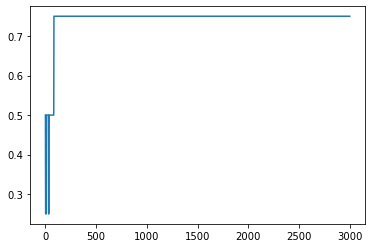

In [15]:
# LeakyReLU
model = Sequential()
model.add(Dense(5, activation = LeakyReLU(0.1)))
model.add(Dense(5, activation = LeakyReLU(0.1)))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X, y,  epochs=3000, verbose=0)
print(model.predict(X))
print(model.evaluate(X, y))
plt.plot(hist.history['accuracy'])

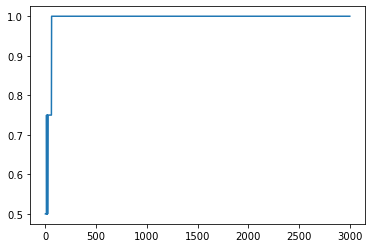

In [18]:
model = Sequential()

for i in range(10) :
    model.add(Dense(5, activation = LeakyReLU(0.1)))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X, y, epochs = 3000, verbose = 0)
plt.plot(hist.history['accuracy'])

In [19]:
layers = [3, 5, 10, 15, 20]

for ex in layers :
    model = Sequential()
    for i in range(ex) :
        model.add(Dense(5, activation=LeakyReLU(0.1)))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    hist = model.fit(X, y,  epochs=3000, verbose=0)
    print(model.evaluate(X, y))

1/1 [==============================] - 0s 135ms/step - loss: 3.3061e-04 - accuracy: 1.0000
[0.0003306063008494675, 1.0]
1/1 [==============================] - 0s 130ms/step - loss: 2.8707e-05 - accuracy: 1.0000
[2.8706572265946306e-05, 1.0]
1/1 [==============================] - 0s 153ms/step - loss: 1.3075e-05 - accuracy: 1.0000
[1.3074870366835967e-05, 1.0]
1/1 [==============================] - 0s 327ms/step - loss: 7.3597e-06 - accuracy: 1.0000
[7.359747542068362e-06, 1.0]
1/1 [==============================] - 0s 348ms/step - loss: 3.9657e-06 - accuracy: 1.0000
[3.965749328926904e-06, 1.0]


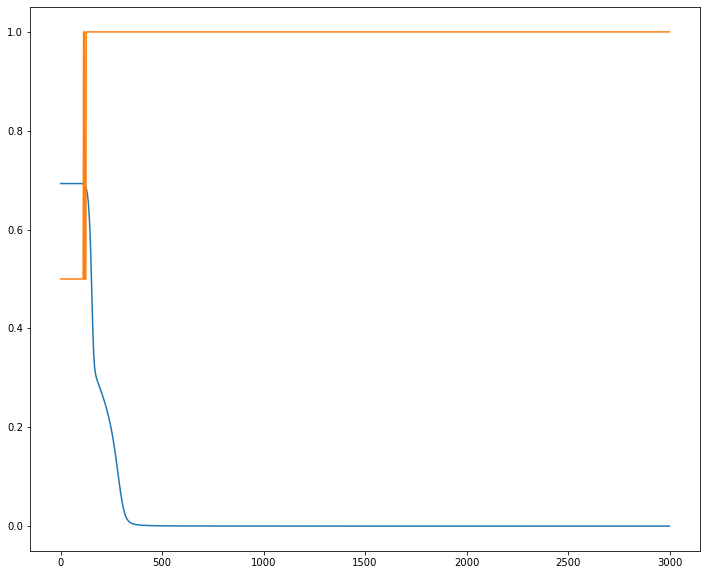

In [21]:
plt.figure(figsize = (12, 10))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])

# 가중치 초기화

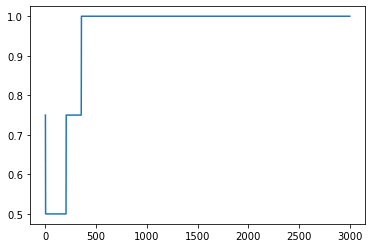

In [28]:
model = Sequential()
model.add(Dense(5, activation=LeakyReLU(0.1), kernel_initializer='he_normal'))
model.add(Dense(10, activation=LeakyReLU(0.1), kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='he_normal'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(X, y,  epochs=3000, verbose=0)
plt.plot(hist.history['accuracy'])

# fashion-mnist 영상 인식

In [30]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()               

4431872/4422102 [==============================] - 1s 0us/step


In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


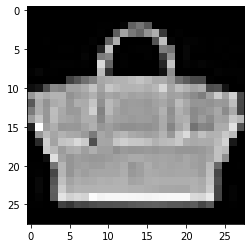

In [32]:
# 이미지 확인(범위)
x_train[0]   #흑백이미지 28x28  0~255
plt.imshow(x_train[233], cmap='gray')

In [33]:
# 레이블 확인  (레이블, one-hot, 정렬)
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Text(0.5, 1.0, 'Ankle boot')

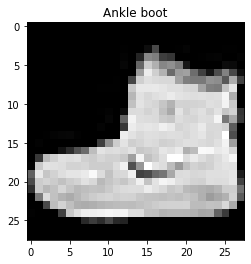

In [34]:
plt.imshow(x_train[0], cmap='gray')
plt.title(class_names[y_train[0]])

In [37]:
# 네트워크 구성

x_train_1d = x_train.reshape(-1, 784)
print(x_train_1d.shape)

model = Sequential([
    Dense(128, input_shape=(784,)),   #  70% - 150% (2^ 사용)
    Activation('relu'),

    Dense(64),   #  70% - 150% (2^ 사용)
    Activation('relu'),

    Dense(10),
    Activation('softmax'),
])

model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])
model.fit(x_train_1d, y_train, epochs=2)

(60000, 784)
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_231 (Dense)            (None, 128)               100480    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_232 (Dense)            (None, 64)                8256      
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_233 (Dense)            (None, 10)                650       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
__________________________________

In [38]:
#Flatten 레이어 사용하기
#a = np.array([[[1,2], [3,4]]])
#print(a.shape)
#a.flatten()

model = Sequential([

    Flatten(input_shape=(28, 28)),  

    Dense(128), 
    Activation('relu'),

    Dense(64),  
    Activation('relu'),

    Dense(10),
    Activation('softmax'),
])

model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=2)

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_234 (Dense)            (None, 128)               100480    
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_235 (Dense)            (None, 64)                8256      
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_236 (Dense)            (None, 10)                650       
_________________________________________________________________
activation_5 (Activation)    (None, 10)              

In [39]:
%%time
hist = model.fit(x_train, y_train, epochs=70)

Epoch 1/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4764 - accuracy: 0.8306
Epoch 2/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4395 - accuracy: 0.8416
Epoch 3/70
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4177 - accuracy: 0.8492
Epoch 4/70
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4011 - accuracy: 0.8582
Epoch 5/70
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3874 - accuracy: 0.8606
Epoch 6/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3789 - accuracy: 0.8632
Epoch 7/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3690 - accuracy: 0.8676
Epoch 8/70
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3636 - accuracy: 0.8699
Epoch 9/70
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3557 - accuracy: 0.8746
Epoch 10/70
1875/1875 [==============================] - 3s 2ms/step - loss: 0.354

# 테스트 데이터에 대한 인식률 분석

In [40]:
loss, accuracy = model.evaluate(x_test, y_test)
loss, accuracy

313/313 [==============================] - 0s 1ms/step - loss: 0.6101 - accuracy: 0.8650


(0.6100871562957764, 0.8650000095367432)

In [43]:
p = model.predict(x_test)
print(p.shape)
p[0]
y_= np.argmax(p, axis=1)
print(y_)
print(  np.mean(y_  == y_test))

(10000, 10)
[9 2 1 ... 8 1 5]
0.865


Text(0.5, 1.0, 'Sandal Sneaker')

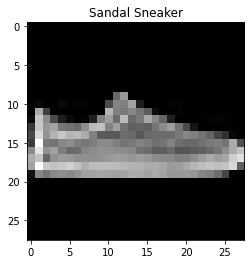

In [44]:
# 첫번째 test 이미지에 대해서 이미지, 예측결과(레이블), 확률값을 그래프로 출력
img = x_test[12]

p = model.predict(img.reshape(1,28,28))   # 1 28 28 ,       p=1x10
y_ = np.argmax(p)

plt.imshow(img, cmap='gray')
plt.title(class_names[y_] + ' ' + class_names[y_test[12]])

<BarContainer object of 10 artists>

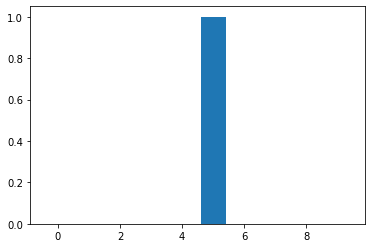

In [45]:
plt.bar(range(0,10), p[0,:])

Text(0.5, 1.0, 'Sandal Sneaker')

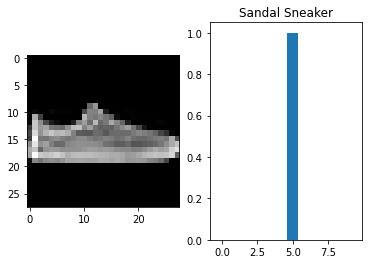

In [47]:
title = class_names[y_] + ' ' + class_names[y_test[12]]
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.bar(range(0,10), p[0])
plt.title(title)

Text(0.5, 1.0, 'predict:Pullover   T:Coat')

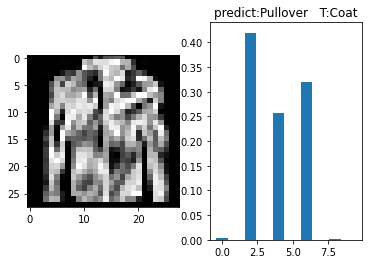

In [48]:
idx = 17

img = x_test[idx]
p = model.predict(img.reshape(1,28,28)) 
y_ = np.argmax(p)

title = f"predict:{class_names[y_]}   T:{class_names[y_test[idx]]}"
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.bar(range(0,10), p[0])
plt.title(title)

In [49]:
p = model.predict(x_test)
y_= np.argmax(p, axis=1)
o = y_test == y_
error = np.where( o == False)

print(error, error[0].shape)

(array([  12,   17,   23, ..., 9985, 9989, 9991], dtype=int64),) (1350,)


# confusion matrix

[[864   3  22  24   7   3  70   0   7   0]
 [  3 965   4  20   3   0   5   0   0   0]
 [ 12   3 777  14 130   0  62   0   2   0]
 [ 37  10  10 882  23   1  32   0   5   0]
 [  0   1  89  42 828   0  34   0   6   0]
 [  2   0   0   0   0 964   0  18   1  15]
 [189   5 108  29 124   1 533   0  11   0]
 [  0   0   0   0   0  25   0 917   1  57]
 [  5   1   4   5   2   9  12   3 959   0]
 [  1   0   0   0   0  15   1  22   0 961]]


<AxesSubplot:>

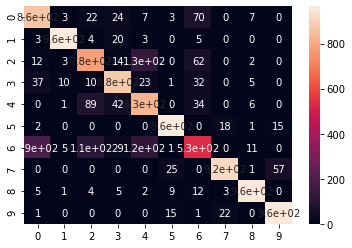

In [55]:
p = np.argmax(model.predict(x_test), axis=-1)
cm = confusion_matrix(y_test, p)
print(cm)
sns.heatmap(cm, annot=True)

<AxesSubplot:>

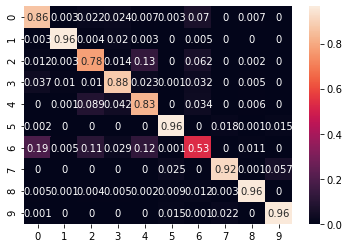

In [56]:
cm_r = cm /  np.sum(cm, axis=1).reshape(-1, 1)       #       Nxm    /   m
sns.heatmap(cm_r, annot=True)

In [57]:
class_names[1],class_names[5], class_names[7], class_names[8]

('Trouser', 'Sandal', 'Sneaker', 'Bag')

In [58]:
a= np.array([[1,2,3], 
             [4,6,8]])

m = np.sum(a, axis=1)
print(m)

a / m.reshape(-1, 1)

[ 6 18]


array([[0.16666667, 0.33333333, 0.5       ],
       [0.22222222, 0.33333333, 0.44444444]])

# mini-batch

In [59]:
model = Sequential([

    Flatten(input_shape=(28, 28)),  

    Dense(128, kernel_initializer='he_normal'), 
    Activation('relu'),

    Dense(64, kernel_initializer='he_normal'),  
    Activation('relu'),

    Dense(10, kernel_initializer='he_normal'),
    Activation('softmax'),
])

model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

hist = model.fit(x_train, y_train, epochs=70, batch_size = 6000) #  60번 update


Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_237 (Dense)            (None, 128)               100480    
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_238 (Dense)            (None, 64)                8256      
_________________________________________________________________
activation_7 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_239 (Dense)            (None, 10)                650       
_________________________________________________________________
activation_8 (Activation)    (None, 10)              

10/10 [==============================] - 0s 24ms/step - loss: 0.5456 - accuracy: 0.8658
Epoch 70/70
10/10 [==============================] - 0s 24ms/step - loss: 0.5470 - accuracy: 0.8637


In [60]:
# 속도 빠르기, 정확도
model.evaluate(x_test, y_test, batch_size=32)

313/313 [==============================] - 1s 1ms/step - loss: 1.0657 - accuracy: 0.8229


[1.0656837224960327, 0.8228999972343445]

In [61]:
%time
model.fit(x_train, y_train, epochs = 2, batch_size = 128)

Wall time: 0 ns
Epoch 1/2
469/469 [==============================] - 1s 3ms/step - loss: 1.1568 - accuracy: 0.7929
Epoch 2/2
469/469 [==============================] - 1s 2ms/step - loss: 0.6246 - accuracy: 0.8208


In [62]:
%time
model.fit(x_train, y_train, epochs=2, batch_size=256)

Wall time: 0 ns
Epoch 1/2
235/235 [==============================] - 1s 4ms/step - loss: 0.4319 - accuracy: 0.8523
Epoch 2/2
235/235 [==============================] - 1s 4ms/step - loss: 0.4003 - accuracy: 0.8601


# DropOut 적용

In [66]:
model = Sequential([

    Flatten(input_shape=(28, 28)),  

    Dense(256, kernel_initializer='he_normal'), 
    Activation('relu'),
    Dropout(0.3),

    Dense(256, kernel_initializer='he_normal'), 
    Activation('relu'),
    Dropout(0.3),


    Dense(256, kernel_initializer='he_normal'), 
    Activation('relu'),
    Dropout(0.3),


    Dense(128, kernel_initializer='he_normal'),  
    Activation('relu'),
    Dropout(0.3),

    Dense(10, kernel_initializer='he_normal'),
    Activation('softmax')
    
])

model.compile(loss='sparse_categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

model.summary()

hist = model.fit(x_train, y_train, epochs=5, batch_size=64) 


Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_246 (Dense)            (None, 256)               200960    
_________________________________________________________________
activation_15 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_247 (Dense)            (None, 256)               65792     
_________________________________________________________________
activation_16 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)             